### Codio Activity 15.1: Introduction to Gradient Descent

This activity introduces the iterative procedure to use the derivative in finding maximum or minimum values of a function.  To begin, you will use a numeric approximation for the derivative (slope of tangent line) and write the equation for this line.  Then, you will use this line to approximate a value of the function a short distance from the point of tangency.  In the next assignment, you will repeatedly apply this operation using gradient descent to locate the minimum value of a function.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from scipy.optimize import minimize

### Problem 1

#### Examining the Function

To begin, define a function $f(x) = x^2$ and a domain $x = [-2, 2]$. Plot the function and identify whether a maximum or minimum value exists. Generate 100 samples.

HINT: To define a domain, use numpy's `linspace`.


In [3]:
lst = np.linspace(-2,2,100)
lst

array([-2.        , -1.95959596, -1.91919192, -1.87878788, -1.83838384,
       -1.7979798 , -1.75757576, -1.71717172, -1.67676768, -1.63636364,
       -1.5959596 , -1.55555556, -1.51515152, -1.47474747, -1.43434343,
       -1.39393939, -1.35353535, -1.31313131, -1.27272727, -1.23232323,
       -1.19191919, -1.15151515, -1.11111111, -1.07070707, -1.03030303,
       -0.98989899, -0.94949495, -0.90909091, -0.86868687, -0.82828283,
       -0.78787879, -0.74747475, -0.70707071, -0.66666667, -0.62626263,
       -0.58585859, -0.54545455, -0.50505051, -0.46464646, -0.42424242,
       -0.38383838, -0.34343434, -0.3030303 , -0.26262626, -0.22222222,
       -0.18181818, -0.14141414, -0.1010101 , -0.06060606, -0.02020202,
        0.02020202,  0.06060606,  0.1010101 ,  0.14141414,  0.18181818,
        0.22222222,  0.26262626,  0.3030303 ,  0.34343434,  0.38383838,
        0.42424242,  0.46464646,  0.50505051,  0.54545455,  0.58585859,
        0.62626263,  0.66666667,  0.70707071,  0.74747475,  0.78

In [5]:
y = []
for i in lst:
    y.append(i*i)


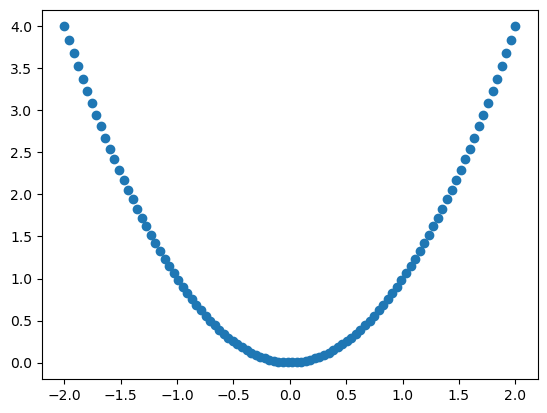

In [6]:
plt.scatter(lst,y)

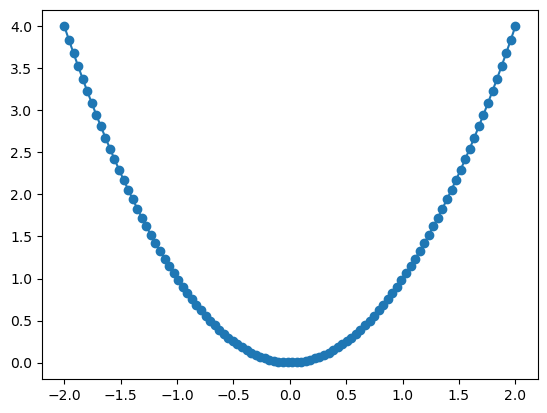

In [14]:
plt.plot(lst,y, linestyle = '-', marker = 'o')

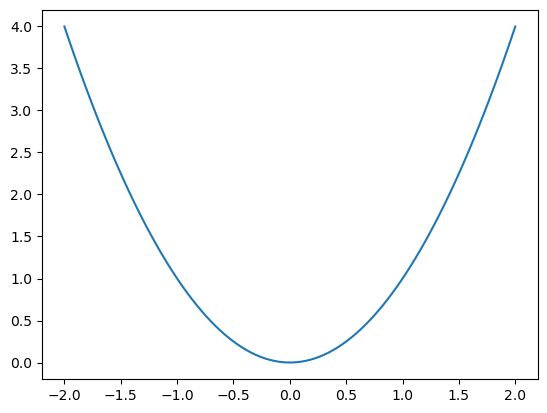

In [15]:
plt.plot(lst,y)

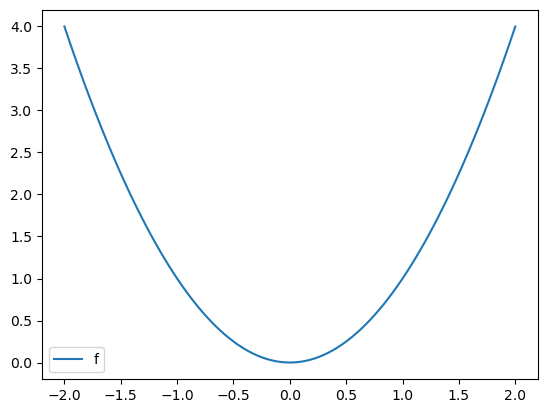

In [16]:
def f(x): return x**2
x = np.linspace(-2, 2, 100)

plt.plot(x, f(x), label = 'f')
plt.legend();

In [18]:
lambda x: x**2


<function __main__.<lambda>(x)>

In [23]:
f

<function __main__.f(x)>

In [24]:
(lambda x: x**2)(x)

array([4.00000000e+00, 3.84001632e+00, 3.68329762e+00, 3.52984389e+00,
       3.37965514e+00, 3.23273135e+00, 3.08907254e+00, 2.94867871e+00,
       2.81154984e+00, 2.67768595e+00, 2.54708703e+00, 2.41975309e+00,
       2.29568411e+00, 2.17488011e+00, 2.05734109e+00, 1.94306703e+00,
       1.83205795e+00, 1.72431385e+00, 1.61983471e+00, 1.51862055e+00,
       1.42067136e+00, 1.32598714e+00, 1.23456790e+00, 1.14641363e+00,
       1.06152433e+00, 9.79900010e-01, 9.01540659e-01, 8.26446281e-01,
       7.54616876e-01, 6.86052444e-01, 6.20752984e-01, 5.58718498e-01,
       4.99948985e-01, 4.44444444e-01, 3.92204877e-01, 3.43230283e-01,
       2.97520661e-01, 2.55076013e-01, 2.15896337e-01, 1.79981635e-01,
       1.47331905e-01, 1.17947148e-01, 9.18273646e-02, 6.89725538e-02,
       4.93827160e-02, 3.30578512e-02, 1.99979594e-02, 1.02030405e-02,
       3.67309458e-03, 4.08121620e-04, 4.08121620e-04, 3.67309458e-03,
       1.02030405e-02, 1.99979594e-02, 3.30578512e-02, 4.93827160e-02,
      

### Problem 2

#### Approximating the derivative

The definition of the derivative $f'$ of a function $f$ is:

$$f'(x) =  \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}$$

Using this definition to substitute a small value for $h$ in the difference quotient we have:

$$\frac{f(x + 0.0001) - f(x)}{0.0001}$$

Define a function `df` below that takes in a value `x` and returns this approximate derivative of $f$ along $x$.  

In [26]:
x = np.linspace(-2,2,100)
def df(x):
    return (f(x+0.0001) - f(x))/0.0001


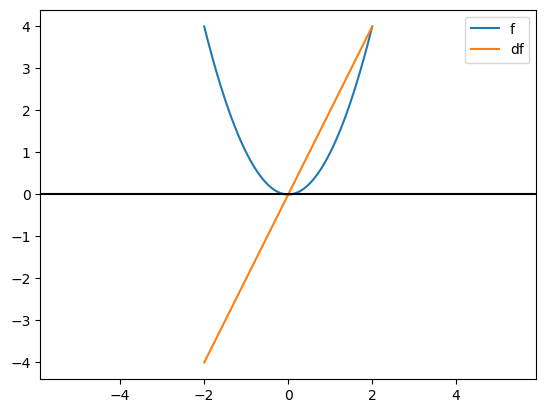

In [37]:
plt.plot(x, f(x), label = 'f')
plt.plot(x, df(x), label = 'df')
plt.ylim(-1, 4)
plt.axhline(color = 'black')
plt.axis('equal')
plt.legend();

In [28]:
tempx = np.array([-2, -1, 0, 1, 2])
tempx

array([-2, -1,  0,  1,  2])

In [29]:
f(tempx)

array([4, 1, 0, 1, 4])

In [31]:
def mydx(x):
    return (f(x + 0.5) - f(x)) / 0.5

In [32]:
mydx(tempx)

array([-3.5, -1.5,  0.5,  2.5,  4.5])

(np.float64(-2.2), np.float64(2.2), np.float64(-3.9), np.float64(4.9))

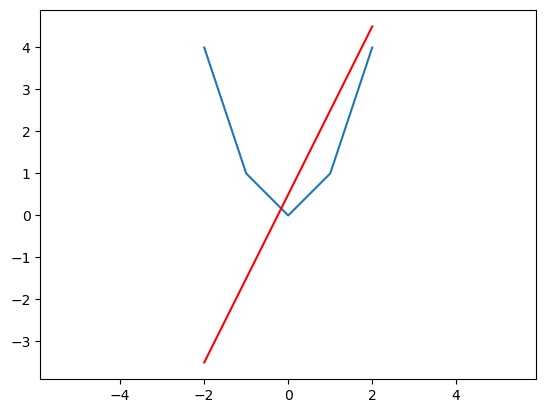

In [36]:
plt.plot([-2, -1,  0,  1,  2], [4, 1, 0, 1, 4])
plt.plot([-2, -1,  0,  1,  2], [-3.5, -1.5,  0.5,  2.5,  4.5], color = "red")
plt.axis('equal')

### Problem 3

#### Slope of tangent at $x = 1$

Use the function $f(x) = x^2$ and $f'(x)$ to determine the slope of the tangent line (the value of the derivative) at $x = 1$.  Assign this as a float to `m` below.

In [40]:
m = df(1)
m

2.000099999999172

In [41]:
print(f'The slope of the tangent line at x = 1 is {m: .2f}')

The slope of the tangent line at x = 1 is  2.00


### Problem 4

#### Equation of tangent line at $x = 1$

Now, you can use the slope found in problem 3 and the point (1, 1) to write an equation for the tangent line.  Define a function `l` below that represents this line.  Recall the point-slope form for a line is given by:

$$y = m(x - x_0) + y_0$$

where $m = \text{slope}$ and $(x_0, y_0) = (x, f(x))$.

In [42]:
y = m*(x-1) + 1
y

array([-5.0003    , -4.91948788, -4.83867576, -4.75786364, -4.67705152,
       -4.59623939, -4.51542727, -4.43461515, -4.35380303, -4.27299091,
       -4.19217879, -4.11136667, -4.03055455, -3.94974242, -3.8689303 ,
       -3.78811818, -3.70730606, -3.62649394, -3.54568182, -3.4648697 ,
       -3.38405758, -3.30324545, -3.22243333, -3.14162121, -3.06080909,
       -2.97999697, -2.89918485, -2.81837273, -2.73756061, -2.65674848,
       -2.57593636, -2.49512424, -2.41431212, -2.3335    , -2.25268788,
       -2.17187576, -2.09106364, -2.01025152, -1.92943939, -1.84862727,
       -1.76781515, -1.68700303, -1.60619091, -1.52537879, -1.44456667,
       -1.36375455, -1.28294242, -1.2021303 , -1.12131818, -1.04050606,
       -0.95969394, -0.87888182, -0.7980697 , -0.71725758, -0.63644545,
       -0.55563333, -0.47482121, -0.39400909, -0.31319697, -0.23238485,
       -0.15157273, -0.07076061,  0.01005152,  0.09086364,  0.17167576,
        0.25248788,  0.3333    ,  0.41411212,  0.49492424,  0.57

In [43]:
def l(x): return m*(x-1) + 1

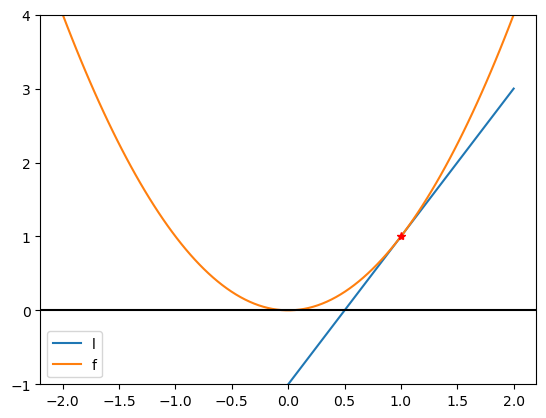

In [53]:
plt.plot(x,l(x),label = 'l')
plt.plot(x,f(x), label = 'f')
plt.plot(1,1,'r*') # 'ro' red o, 'go' green o
plt.ylim(-1,4)
plt.axhline(color = 'black')
plt.legend()

### Problem 5

#### Use tangent line to approximate $x = 0.9$

Now, use the equation of the tangent line to approximate the value of $f(x)$ at $x = 0.9$.  Compare this to the actual value of $f(0.9)$.  Assign the absolute difference between these to `error` below.

In [54]:
error = abs(l(0.9) - f(0.9))
error

0.010009999999917252

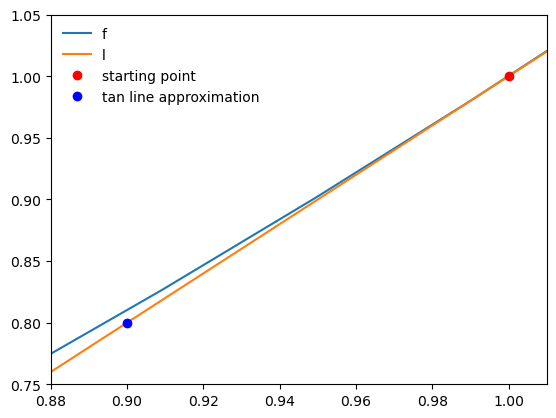

In [57]:
plt.plot(x, f(x), label = 'f')
plt.plot(x, l(x), label = 'l')
plt.plot(1, 1, 'ro', label = 'starting point')
plt.plot(0.9, l(0.9), 'bo', label = 'tan line approximation')
plt.ylim(0.75, 1.05)
plt.xlim(0.88, 1.01)
plt.axhline(color = 'black')
plt.legend(frameon = False);

### Codio Activity 15.2: Gradient Descent by Hand

This activity focuses on computing the minimum of a function using gradient descent.  Following the examples in the lectures, you will compare the effect of adjusting the step size and the starting point.  The beginning of the work was started in the last activity where one step of size 0.1 was taken.  In this assignment you will complete the work using the update formula provided in the lectures.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

#### Gradient Descent Formula

Below is the formula for the gradient descent algorithm.  Note that you need three key ingredients:

- $x_{prev}$: Initial x-value
- $df$: Derivative of function interested in optimizing
- $\alpha$: Step size

These are used to update the previous $x$ value as follows:

$$x_{next} = x_{prev} - \alpha * df(x_{prev})$$

Once updated, the $x_{next}$ becomes $x_{prev}$ and the process is repeated until a minimum is found.  

### Problem 1

#### Examining the Function

To begin, define a function $f(x) = x^2$ and a domain $x = [-2, 2]$.  Plot the function and identify whether a maximum or minimum value exists.

In [2]:
x = np.linspace(-2,2,100)
def f(x): return x**2
    

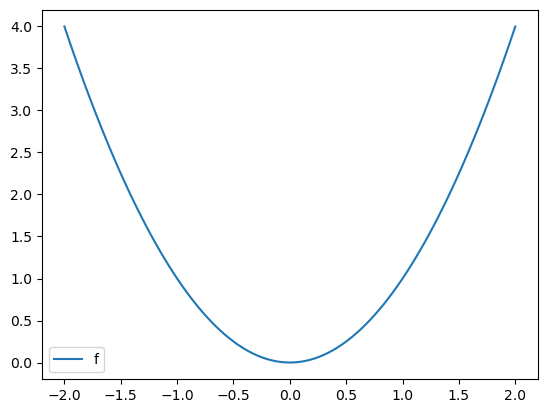

In [3]:
plt.plot(x,f(x),label = 'f')
plt.legend()

### Problem 2

#### Taking a step

Now, use the function `df` below to approximate the value of a derivative of $f$. Use the formula for gradient descent to compute the next value of $x$ given the starting point `x0` and `step_size = 0.1`.

$$x_{1} = x_{0} - \alpha * df(x_{0})$$

In [14]:
def df(x): 
    return (f(x + 0.0001) - f(x))/0.0001

In [5]:
x0 = 1
x1 = x0 - 0.1*df(x0)
x1

0.7999900000000828

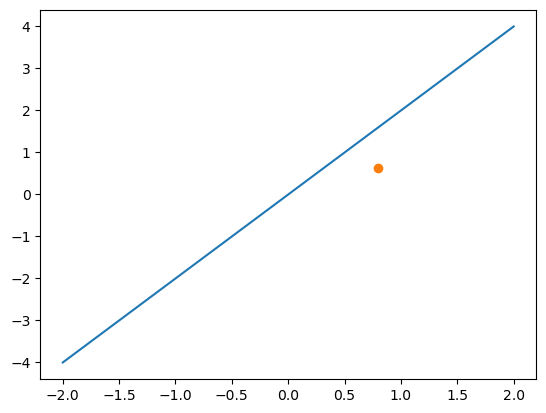

In [11]:
plt.plot(x,f(x))
plt.plot(x1,f(x1),'o',label = 'Step 1')

In [15]:
x0 = 1
step_size = ''
x1 = ''


step_size = 0.1
x1 = x0 - step_size * df(x0)

In [17]:
x1

0.7999900000000828

In [22]:
f(10)

100

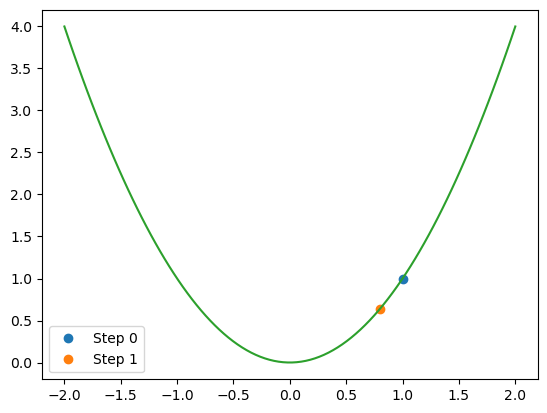

In [18]:
plt.plot(x0, f(x0), 'o', label = 'Step 0')
plt.plot(x1, f(x1), 'o', label = 'Step 1')
plt.plot(x, f(x))
plt.legend();

### Problem 3

#### Repeating the Process

Now, keep track of your updated $x$ values in the list `xs` below.  Use the starting value $x_0 = 1$ as given in the list, and perform 50 updates using the gradient descent formula.  Be sure to append each update to the list `xs`. 

$$x_{next} = x_{prev} - \alpha * df(x_{prev})$$

In [19]:
xs = [1]
for i in range(50):
    x_next = xs[-1] - 0.1*df(xs[-1])
    xs.append(x_next)

print(len(xs)) #should be 51
print([round(i, 2) for i in xs[-5:]])

51
[-0.0, -0.0, -0.0, -0.0, -0.0]


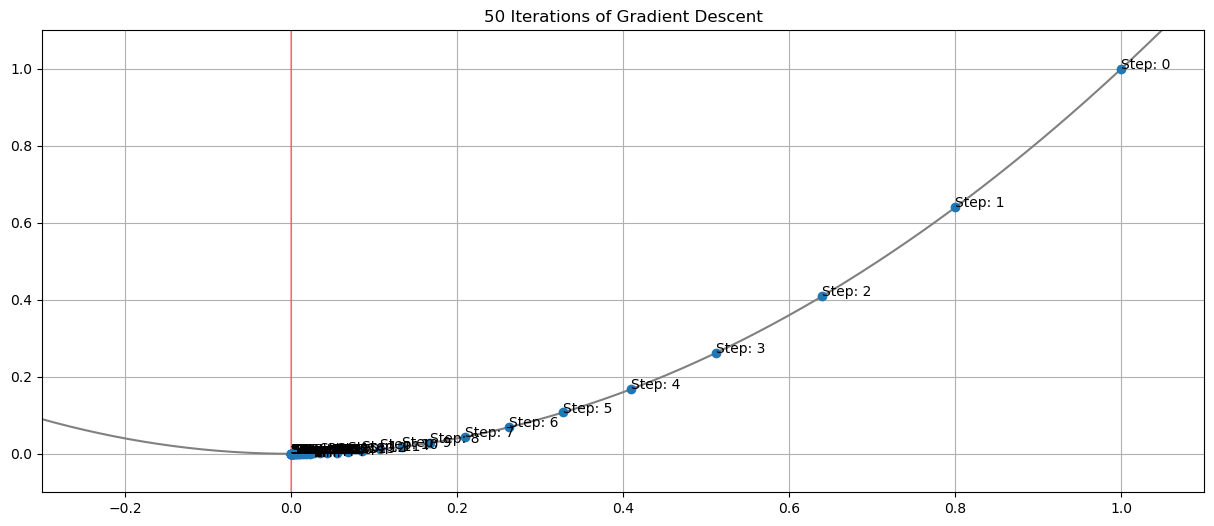

In [20]:
x = np.linspace(-3, 3, 1000)
plt.figure(figsize = (15, 6))
for i, x0 in enumerate(xs):
  plt.text(x0, f(x0), f'Step: {i}');
plt.axvline(x0, color = 'red', alpha = 0.3)
plt.plot(x, f(x), color = 'gray')
plt.plot(xs, f(np.array(xs)), 'o')
plt.xlim(-.3, 1.1)
plt.ylim(-0.1, 1.1)
plt.title('50 Iterations of Gradient Descent')
plt.grid();

### Problem 4

#### Adjusting the Step Size

Repeat the above process but this time use `step_size = 0.01`.  Again, compute 50 iterations of gradient descent tracking the updated values in the list `xs`.  What is different about the results this time?  

$$x_{next} = x_{prev} - \alpha * df(x_{prev})$$

In [23]:
xs = [1]
step_size = 0.01
for i in range(50):
    x_next = xs[-1] - step_size * df(xs[-1])
    xs.append(x_next)
print(len(xs)) #should be 51
print([round(i, 2) for i in xs[-5:]])

51
[0.39, 0.39, 0.38, 0.37, 0.36]


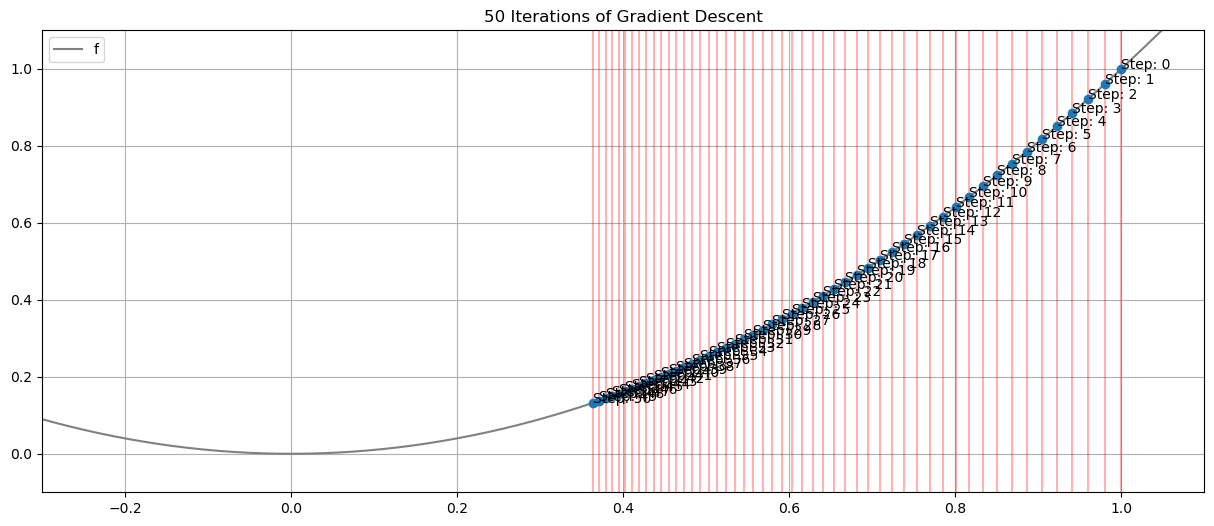

In [24]:
x = np.linspace(-3, 3, 1000)
plt.figure(figsize = (15, 6))
for i, x0 in enumerate(xs):
  plt.text(x0, f(x0), f'Step: {i}');
  plt.axvline(x0, color = 'red', alpha = 0.3)
plt.plot(x, f(x), color = 'gray', label = 'f')
plt.plot(xs, f(np.array(xs)), 'o')
plt.xlim(-.3, 1.1)
plt.ylim(-0.1, 1.1)
plt.legend()
plt.title('50 Iterations of Gradient Descent')
plt.grid();

### Problem 5

#### Adjusting the starting value

Now, you are to examine the effect of changing the starting value. To demonstrate the effect of changing the starting point, consider instead the function

$$f(x) = x^2(x - 2)(x + 1)$$

Use gradient descent to examine the minimum value found with $x_0 = 2$ compared to that when $x_0 = -2$.  Which of the starting values locates the **absolute minimum** of the function $f(x)$?  Assign your solution as an integer to `best_start` below.

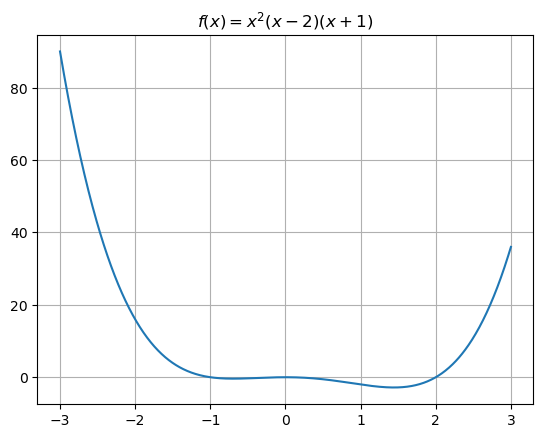

In [25]:
def f(x):
  return x**2*(x - 2)*(x + 1)

plt.plot(x, f(x))
plt.title(r'$f(x) = x^2(x - 2)(x + 1)$')
plt.grid();

Minimum is at x = 2


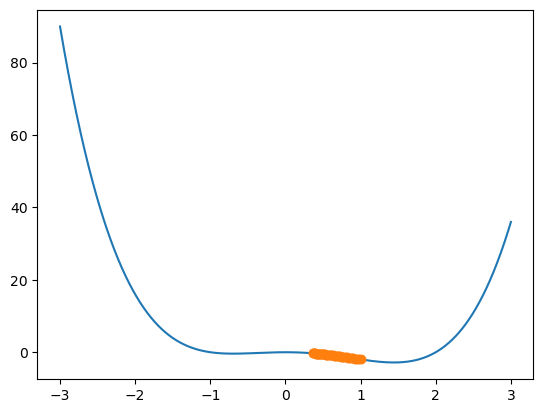

In [26]:
best_start = 2

print(f'Minimum is at x = {best_start}')
plt.plot(x, f(x))
plt.plot(xs, f(np.array(xs)), 'o')

Now that you see the importance of both the starting value and step size parameter, consider looking for further refinements to the basic gradient descent model.  In the next activity, you will explore how to use gradient descent in identifying the parameters for a linear regression model.  Here, you will minimize the **MEAN SQUARED ERROR** function rather than an aribitrary polynomial.